###Purpose: 

Conduct exploratory analysis on NBA player data, with a focus on trends in physical characteristics and game-related statistics.

###Guiding questions

Geographic:
- Which states produce the most NBA players (D)
- Which colleges produce the most NBA players (D)
- International participation (D)

Physical (By decade and position):
- How has height changed within the league? (D)
- How has weight changed within the league? (D)

Stats:
- How has 3-pointer usage changed over the decades? (D)

General (By decade and position):
- What is the average draft age? (D)
- How long do players stay in the league? (D)





In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading in the first CSV file, dropping the first column which is just redundant numerical data
players = pd.read_csv('Players.csv')
players = players.drop(['Unnamed: 0', 'birth_city'], axis=1)
players.head()

,Player,height,weight,collage,born,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Kentucky


In [3]:
#drop all entries with any empty (NaN) entries 
players = players.dropna(axis=0,how='any')
players = players.reset_index(drop=True)
players

,Player,height,weight,collage,born,birth_state
0,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Indiana
1,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Kentucky
2,Charlie Black,196.0,90.0,University of Kansas,1921.0,Idaho
3,Nelson Bobb,183.0,77.0,Temple University,1924.0,Pennsylvania
4,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Jersey
...,...,...,...,...,...,...
3184,Okaro White,203.0,92.0,Florida State University,1992.0,Florida
3185,Isaiah Whitehead,193.0,96.0,Seton Hall University,1995.0,New York
3186,Troy Williams,198.0,97.0,South Carolina State University,1969.0,South Carolina
3187,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Oregon


In [4]:
#caclulate basic statistical values from the data 
players.describe()

,height,weight,born
count,3189.000000,3189.000000,3189.000000
mean,198.663531,94.723424,1964.063656
std,9.043461,11.804876,18.604145
min,160.000000,60.000000,1915.000000
25%,193.000000,86.000000,1952.000000
50%,198.000000,95.000000,1965.000000
75%,206.000000,102.000000,1979.000000
max,231.000000,163.000000,1997.000000


In [5]:
#list of every US state
states = [
    'Alabama',
    'Alaska',
    'Arizona',
    'Arkansas',
    'California',
    'Colorado',
    'Connecticut',
    'Delaware',
    'District of Columbia',
    'Florida',
    'Georgia',
    'Hawaii',
    'Idaho',
    'Illinois',
    'Indiana',
    'Iowa',
    'Kansas',
    'Kentucky',
    'Louisiana',
    'Maine',
    'Maryland',
    'Massachusetts',
    'Michigan',
    'Minnesota',
    'Mississippi',
    'Missouri',
    'Montana',
    'Nebraska',
    'Nevada',
    'New Hampshire',
    'New Jersey',
    'New Mexico',
    'New York',
    'North Carolina',
    'North Dakota',
    'Ohio',
    'Oklahoma',
    'Oregon',
    'Pennsylvania',
    'Rhode Island',
    'South Carolina',
    'South Dakota',
    'Tennessee',
    'Texas',
    'Utah',
    'Vermont',
    'Virginia',
    'Washington',
    'West Virginia',
    'Wisconsin',
    'Wyoming',
]

In [6]:
#finds the state (or country if international) that every drafted player came from and adds to list
birth_states = []
for i in range(len(players)):
  birth_states.append(players.iloc[i].birth_state)

#birth_states

In [7]:
US = False
count_US = 0
UnitedStates = []
count_TOTAL = 0
Other = []

#checks to see the number of 'states' that are within the US, and divides by total to get percentage of American players
for birth in birth_states:
  for state in states:
    if birth == state:
      US = True
      UnitedStates.append(birth)
    if US == True:
      count_US += 1
    US = False
  count_TOTAL += 1
  Other.append(birth)
      
#calculates the percentage of American players 
percent_US = round(count_US / count_TOTAL * 100,2)
print('The percentage of players in the history of the NBA coming from the US is {}{}'.format(percent_US,'%'))

The percentage of players in the history of the NBA coming from the US is 94.45%


In [8]:
#converts the list into sets, and finds unique values (international countries), then re-converts into list 
international = (set(Other) | set(states)) - (set(Other) & set(states))
international = list(international)

In [9]:
print(international)

['U.S. Virgin Islands', 'South Africa', 'Belgium', 'Puerto Rico', 'Panama', 'Poland', 'Ukraine', 'Italy', 'United Republic of Tanzania', 'China', 'Luxembourg', 'Brazil', 'Serbia', 'Senegal', 'Lebanon', 'Russia', 'Venezuela', 'Trinidad and Tobago', 'Spain', 'France', 'Jamaica', 'Sweden', 'Lithuania', 'Romania', 'Norway', 'Finland', 'Germany', 'Slovakia', 'Denmark', 'Japan', 'Australia', 'Taiwan', 'Gabon', 'Israel', 'Nigeria', 'Czech Republic', 'Egypt', 'Dominica', 'Mexico', 'Iceland', 'Saint Vincent and the Grenadines', 'Guyana', 'South Sudan', 'Cameroon', 'Martinique', 'Netherlands', 'Montenegro', 'United Kingdom', 'Bahamas', 'Haiti', 'Argentina', 'Ireland', 'Austria', 'Democratic Republic of the Congo', 'Switzerland', 'Croatia', 'Canada', 'Mali', 'Dominican Republic', 'New Zealand', 'Morocco', 'Vermont']


In [10]:
#creates a final list of international countries that NBA players came from 
Final = []
print(len(Other))
for place in Other:
  if place in international:
    Final.append(place)

print(len(Final))

#convert the list into a Pandas dataframe, and lists out the international countries ranked by # of players (top 20)
print(Final)
international = pd.Series(Final)
international = international.value_counts()[:20]
international=international.reset_index()
international.columns = ['index', 'Country Count']
print(international)

print(len(international))

3189
177
['Poland', 'Canada', 'Canada', 'United Kingdom', 'China', 'Germany', 'Morocco', 'Netherlands', 'Romania', 'Denmark', 'Puerto Rico', 'Bahamas', 'United Kingdom', 'Germany', 'Panama', 'Iceland', 'France', 'Canada', 'Spain', 'Canada', 'Canada', 'Germany', 'Panama', 'Nigeria', 'Jamaica', 'Germany', 'South Sudan', 'Canada', 'Jamaica', 'Haiti', 'Germany', 'Canada', 'Canada', 'France', 'Haiti', 'Germany', 'Germany', 'Brazil', 'Dominican Republic', 'Lebanon', 'Puerto Rico', 'Puerto Rico', 'Lebanon', 'Netherlands', 'Norway', 'United Kingdom', 'Egypt', 'Serbia', 'Bahamas', 'Jamaica', 'Canada', 'Trinidad and Tobago', 'Australia', 'Democratic Republic of the Congo', 'Bahamas', 'Germany', 'Australia', 'Netherlands', 'Slovakia', 'Nigeria', 'Nigeria', 'U.S. Virgin Islands', 'Czech Republic', 'Mexico', 'South Africa', 'Ukraine', 'France', 'U.S. Virgin Islands', 'Saint Vincent and the Grenadines', 'France', 'Nigeria', 'Dominican Republic', 'New Zealand', 'Senegal', 'Nigeria', 'Sweden', 'Nigeri

In [11]:
import plotly.express as px
#displays the data in the form of a pie chart 
fig1 = px.pie(international, values='Country Count', names='index')
fig1.show()

In [12]:
#alternative depiction of data
fig2 = px.bar(international, x='index', y='Country Count', color_discrete_sequence=px.colors.sequential.RdBu)
fig2.show()

Looking at Geographic patterns, with the 20 most popular states for players to come out of 

In [13]:
state_pie=players['birth_state'].value_counts()[:40]
state_pie = pd.DataFrame(state_pie)
state_pie=state_pie.reset_index()
dropped = state_pie[(state_pie['index'] == 'Canada')].index

print(dropped)

international = state_pie.loc[state_pie['index'] == 'Germany']
international = international.index.values.astype(int)[0]

state_pie.drop([30,international], inplace=True)
state_pie=state_pie.reset_index()
print(state_pie.columns.values)
print(state_pie)

Int64Index([30], dtype='int64')
['level_0' 'index' 'birth_state']
    level_0                 index  birth_state
0         0            California          337
1         1              New York          286
2         2              Illinois          203
3         3          Pennsylvania          162
4         4                  Ohio          136
5         5              Michigan          131
6         6                 Texas          127
7         7               Georgia          113
8         8             Louisiana          101
9         9        North Carolina           96
10       10               Indiana           94
11       11               Florida           93
12       12            New Jersey           91
13       13              Kentucky           82
14       14               Alabama           74
15       15           Mississippi           72
16       16             Tennessee           72
17       17              Maryland           61
18       18              Virginia        

In [14]:
# looks at geographic data within the US, determining players drafted by state (top 20)
import plotly.express as px


state_pie1=players['birth_state'].value_counts()[:20]
state_pie1 = pd.DataFrame(state_pie1)
state_pie1=state_pie1.reset_index()
print(state_pie1)
fig1 = px.pie(state_pie1, values='birth_state', names='index', color_discrete_sequence=px.colors.sequential.RdBu)
fig1.show()
#make a geographic heat map 

                   index  birth_state
0             California          337
1               New York          286
2               Illinois          203
3           Pennsylvania          162
4                   Ohio          136
5               Michigan          131
6                  Texas          127
7                Georgia          113
8              Louisiana          101
9         North Carolina           96
10               Indiana           94
11               Florida           93
12            New Jersey           91
13              Kentucky           82
14               Alabama           74
15           Mississippi           72
16             Tennessee           72
17              Maryland           61
18              Virginia           60
19  District of Columbia           57


In [15]:
#dictionary to convert full state names to abbreviated code
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [16]:
#yes_state = False
for i in range(len(state_pie)):
  
  #for state in states:
    #if state_pie['index'].iloc[i] == state:
      #yes_state = True
  
  #if yes_state:
  state_pie['index'].iloc[i] = us_state_abbrev[state_pie['index'].iloc[i]]
  #print(state_pie['index'].iloc[i])
  #else:
    #state_pie.drop(state_pie.iloc[i], axis=0)
  #yes_state = False

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_pie['index'], # Spatial coordinates
    z = state_pie['birth_state'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "# of players",
))

fig.update_layout(
    title_text = 'NBA draftees by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

Most popular colleges for players to come out of 

In [18]:
#populatity by college 
college_pie=players['collage'].value_counts()[:20]
college_pie = pd.DataFrame(college_pie)
college_pie=college_pie.reset_index()
fig1 = px.pie(college_pie, values='collage', names='index', color_discrete_sequence=px.colors.sequential.RdBu)
fig1.show()

In [19]:
#line graph for college popularity 
fig2 = px.line(college_pie, x='index', y='collage',)
fig2.show()

In [20]:
#data separated by decade 
decades = players.groupby((players.born//10)*10)
decades = decades.describe()

In [21]:
decades.head()

height                               ...    born                        
        count        mean       std    min  ...     25%     50%     75%     max
born                                        ...                                
1910.0   14.0  192.357143  8.463561  180.0  ...  1917.0  1918.0  1919.0  1919.0
1920.0  169.0  191.846154  7.568733  175.0  ...  1922.0  1924.0  1927.0  1929.0
1930.0  164.0  195.121951  7.889405  175.0  ...  1932.0  1934.0  1937.0  1939.0
1940.0  307.0  197.641694  8.435179  173.0  ...  1943.0  1945.0  1948.0  1949.0
1950.0  581.0  198.798623  8.335367  170.0  ...  1952.0  1955.0  1957.0  1959.0

[5 rows x 24 columns]

In [22]:
# compare average height per decade with average weight per decade, tracking differences 
X = decades.iloc[:,1].values
y = decades.iloc[:,9].values

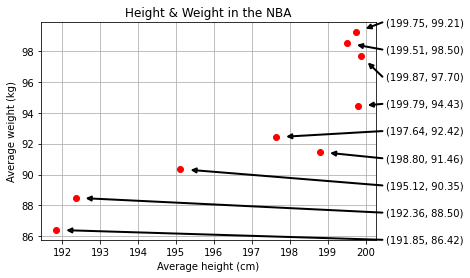

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(X, y, color = 'red')
plt.title('Height & Weight in the NBA')
plt.xlabel('Average height (cm)')
plt.ylabel('Average weight (kg)')

A = X
B = y


# annotations at the side (ordered by B values)
x0,x1=ax.get_xlim()
y0,y1=ax.get_ylim()
for ii, ind in enumerate(np.argsort(B)):
    x = A[ind]
    y = B[ind]
    xPos = x1 + .02 * (x1 - x0)
    yPos = y0 + ii * (y1 - y0)/(len(B) - 1)
    ax.annotate('',#label,
          xy=(x, y), xycoords='data',
          xytext=(xPos, yPos), textcoords='data',
          arrowprops=dict(
                          connectionstyle="arc3,rad=0.",
                          shrinkA=0, shrinkB=10,
                          arrowstyle= '-|>', ls= '-', linewidth=2
                          ),
          va='bottom', ha='left', zorder=19
          )
    ax.text(xPos + .01 * (x1 - x0), yPos,
            '({:.2f}, {:.2f})'.format(x,y),
            transform=ax.transData, va='center')

plt.grid()
plt.show()


In [24]:
weight = decades['weight']
weight = weight['mean']
weightE = weight.loc[1920]
weightL = weight.loc[1990]
weightD = weightL - weightE

height = decades['height']
height = height['mean']
heightE = height.loc[1920]
heightL = height.loc[1990]
heightD = heightL - heightE
print("The average NBA player born in 1990 is {} centimeters taller and {} kilograms heavier than the average player born in 1920.".format(round(heightD,2), round(weightD,2)))

The average NBA player born in 1990 is 8.02 centimeters taller and 11.28 kilograms heavier than the average player born in 1920.


In [25]:
#for i in range(len(players)):
 # if players.born[i] > 1965:
 #   print(players[i])
  #print(players.born > 1965)

In [26]:
stats = pd.read_csv('Seasons_Stats.csv')
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [48]:
#year the 3pt line was added 
headers = stats.columns.values
print(headers)
threes = stats[['Year', '3P', '3PA', '3P%']].copy()
print(threes)
threes = threes.loc[threes['Year'] > 1979]
threes.head()
decades = threes.groupby((threes.Year//10)*10)
decades = decades.describe()
threes = decades['3PA']
print(threes)
threes = threes['mean']
print(threes)
threesE = threes.loc[1980]
threesL = threes.loc[2010]
threesD = threesL - threesE

print("The average player in the NBA after 2010 attempts {} more 3 pointers per season than in the 1980s".format(round(threesD,2)))

['Unnamed: 0' 'Year' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'PER' 'TS%'
 '3PAr' 'FTr' 'ORB%' 'DRB%' 'TRB%' 'AST%' 'STL%' 'BLK%' 'TOV%' 'USG%'
 'blanl' 'OWS' 'DWS' 'WS' 'WS/48' 'blank2' 'OBPM' 'DBPM' 'BPM' 'VORP' 'FG'
 'FGA' 'FG%' '3P' '3PA' '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%'
 'ORB' 'DRB' 'TRB' 'AST' 'STL' 'BLK' 'TOV' 'PF' 'PTS']
         Year    3P   3PA    3P%
5727   1980.0   0.0   1.0  0.000
5728   1980.0   0.0   1.0  0.000
5729   1980.0   0.0   2.0  0.000
5730   1980.0   4.0  18.0  0.222
5731   1980.0   0.0   0.0    NaN
...       ...   ...   ...    ...
24686  2017.0   0.0   1.0  0.000
24687  2017.0   0.0   1.0  0.000
24688  2017.0   0.0   0.0    NaN
24689  2017.0  33.0  99.0  0.333
24690  2017.0   0.0   3.0  0.000

[18927 rows x 4 columns]
         count       mean         std  min  25%   50%    75%    max
Year                                                               
1980.0  3810.0  18.535958   38.492025  0.0  1.0   4.0   17.0  466.0
1990.0  4913.0  54.651537   92

In [28]:
#stats = stats.dropna(axis=0,how='any')
#stats = stats.reset_index(drop=True)
#stats

In [29]:
player_data = pd.read_csv('player_data.csv')
player_data.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


In [30]:
player_data = player_data.drop('college', axis=1)
player_data = player_data.dropna(axis=0,how='any')
player_data = player_data.reset_index(drop=True)
player_data.head(10)

,name,year_start,year_end,position,height,weight,birth_date
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968"
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946"
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969"
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974"
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976"
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954"
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932"
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919"
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993"


In [31]:
#Looking at changes by position 
#player_data1 = player_data.drop(['name', 'height', 'weight'], axis=1)
player_data1 = player_data.drop('name', axis=1)
time_in_league = []
age_at_draft = []
for i in range(len(player_data1)):
    player_data1['position'].iloc[i] = player_data1['position'].iloc[i][0]
    player_data1['birth_date'].iloc[i] = player_data1['birth_date'].iloc[i][-4:]
    time_in_league.append(player_data1['year_end'].iloc[i] - player_data1['year_start'].iloc[i])

player_data1['birth_date'] = player_data1['birth_date'].astype(int)
for i in range(len(player_data1)):
  age_at_draft.append(player_data1['year_start'].iloc[i] - player_data1['birth_date'].iloc[i])

player_data1['time_in_league'] = time_in_league
player_data1['age_at_draft'] = age_at_draft

decades = player_data1.groupby((player_data1.birth_date//10)*10)
decades = decades.describe()
positions = player_data1.groupby([(player_data1.birth_date//10)*10, player_data1.position])
positions = positions.describe()
#print(decades)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# compare average height per decade with average weight per decade, tracking differences 
columns = decades.columns.values
#print(columns)

X = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]
#print(X)

y = decades['time_in_league']
y = y[['mean']]
y = [0.000000
    ,0.972222
    ,1.877315
    ,3.691450
    ,3.788217
    ,4.562112
    ,5.671988
    ,5.819805
    ,5.055085
    ,1.810989]
#print(y)

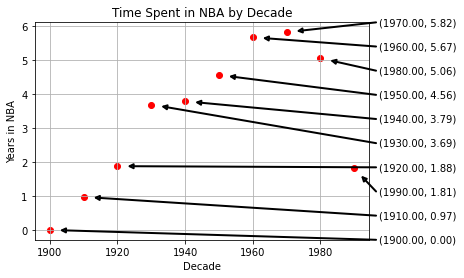

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(X, y, color = 'red')
plt.title('Time Spent in NBA by Decade')
plt.xlabel('Decade')
plt.ylabel('Years in NBA')

A = X
B = y


# annotations at the side (ordered by B values)
x0,x1=ax.get_xlim()
y0,y1=ax.get_ylim()
for ii, ind in enumerate(np.argsort(B)):
    x = A[ind]
    y = B[ind]
    xPos = x1 + .02 * (x1 - x0)
    yPos = y0 + ii * (y1 - y0)/(len(B) - 1)
    ax.annotate('',#label,
          xy=(x, y), xycoords='data',
          xytext=(xPos, yPos), textcoords='data',
          arrowprops=dict(
                          connectionstyle="arc3,rad=0.",
                          shrinkA=0, shrinkB=10,
                          arrowstyle= '-|>', ls= '-', linewidth=2
                          ),
          va='bottom', ha='left', zorder=19
          )
    ax.text(xPos + .01 * (x1 - x0), yPos,
            '({:.2f}, {:.2f})'.format(x,y),
            transform=ax.transData, va='center')

plt.grid()
plt.show()

In [34]:
# compare average height per decade with average weight per decade, tracking differences 
columns = decades.columns.values
#print(columns)

X = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]
#print(X)

y = decades['age_at_draft']
y = y[['mean']]
y = [46.000000
    ,30.277778
    ,25.365741
    ,24.130112
    ,23.947452
    ,23.590062
    ,24.011611
    ,23.987013
    ,23.313559
    ,22.608791]
#print(y)

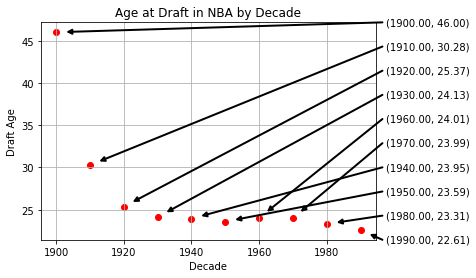

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(X, y, color = 'red')
plt.title('Age at Draft in NBA by Decade')
plt.xlabel('Decade')
plt.ylabel('Draft Age')

A = X
B = y


# annotations at the side (ordered by B values)
x0,x1=ax.get_xlim()
y0,y1=ax.get_ylim()
for ii, ind in enumerate(np.argsort(B)):
    x = A[ind]
    y = B[ind]
    xPos = x1 + .02 * (x1 - x0)
    yPos = y0 + ii * (y1 - y0)/(len(B) - 1)
    ax.annotate('',#label,
          xy=(x, y), xycoords='data',
          xytext=(xPos, yPos), textcoords='data',
          arrowprops=dict(
                          connectionstyle="arc3,rad=0.",
                          shrinkA=0, shrinkB=10,
                          arrowstyle= '-|>', ls= '-', linewidth=2
                          ),
          va='bottom', ha='left', zorder=19
          )
    ax.text(xPos + .01 * (x1 - x0), yPos,
            '({:.2f}, {:.2f})'.format(x,y),
            transform=ax.transData, va='center')

plt.grid()
plt.show()

In [36]:
guards = positions.loc[(slice(None), 'G'), :]
#time in league
G1 = guards['time_in_league']
G1 = G1[['count', 'mean']]
average = 0
total = 0

for i in range(len(G1)):
    average += (G1['count'].iloc[i] * G1['mean'].iloc[i])
    total += G1['count'].iloc[i]

time = (average/total)
print('The average guard spends {} years in the NBA.'.format(round(time,2)))

#age at draft
G2 = guards['age_at_draft']
G2 = G2[['count', 'mean']]
average = 0
total = 0

for i in range(len(G2)):
    average += (G2['count'].iloc[i] * G2['mean'].iloc[i])
    total += G2['count'].iloc[i]

time = (average/total)
print("The average guard is {} years old when they're drafted into the NBA.".format(round(time,2)))

forwards = positions.loc[(slice(None), 'F'), :]
#time in league
F1 = forwards['time_in_league']
F1 = F1[['count', 'mean']]
average = 0
total = 0

for i in range(len(F1)):
    average += (F1['count'].iloc[i] * F1['mean'].iloc[i])
    total += F1['count'].iloc[i]

time = (average/total)
print('The average forward spends {} years in the NBA.'.format(round(time,2)))

#age at draft
F2 = forwards['age_at_draft']
F2 = F2[['count', 'mean']]
average = 0
total = 0

for i in range(len(F2)):
    average += (F2['count'].iloc[i] * F2['mean'].iloc[i])
    total += F2['count'].iloc[i]

time = (average/total)
print("The average forward is {} years old when they're drafted into the NBA.".format(round(time,2)))

centers = positions.loc[(slice(None), 'C'), :]
#time in league
C1 = centers['time_in_league']
C1 = C1[['count', 'mean']]
average = 0
total = 0

for i in range(len(C1)):
    average += (C1['count'].iloc[i] * C1['mean'].iloc[i])
    total += C1['count'].iloc[i]

time = (average/total)
print('The average center spends {} years in the NBA.'.format(round(time,2)))

#age at draft
C2 = centers['age_at_draft']
C2 = C2[['count', 'mean']]
average = 0
total = 0

for i in range(len(C2)):
    average += (C2['count'].iloc[i] * C2['mean'].iloc[i])
    total += C2['count'].iloc[i]

time = (average/total)
print("The average center is {} years old when they're drafted into the NBA.".format(round(time,2)))

The average guard spends 4.06 years in the NBA.
The average guard is 23.98 years old when they're drafted into the NBA.
The average forward spends 4.2 years in the NBA.
The average forward is 23.83 years old when they're drafted into the NBA.
The average center spends 4.77 years in the NBA.
The average center is 24.05 years old when they're drafted into the NBA.


In [37]:
#iterables = [[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990], ['G', 'C', 'F']]
#pd.MultiIndex.from_product(iterables, names=['birth_date', 'position'])

In [38]:
#REQUIRES TOO MUCH RAM FOR GOOGLE COLAB

#for i in range(len(player_data.height)):
 # if len(player_data.height[i]):
  #  player_data.height[i] = player_data.height[0] + player_data.height[2:]
  #else:
   # player_data.height[i] = player_data.height[0] + '0' + player_data.height[2:]